# 蒙特卡洛抽样方法

庞龙刚@华中师范大学

## 学习目标

- 认识蒙特卡洛方法
- 掌握蒙特卡洛抽样

## 学习内容

1. 统计学的基础知识与随机数使用举例
2. 抽取满足给定分布的随机数
   - 直接法
   - 舍选法 (Rejection Sampling)
3. 蒙卡抽样在高能核物理中的应用
   - 碰撞参数的抽样: 注意 平方概率
   - 核子在原子核内分布的抽样（Woods-Saxon 与 $\theta$, $\phi$) 注意 cos(theta) 满足均匀分布，而非 theta
   - 分子动力学模拟中给定温度抽取粒子动量（速度）分布
   - Boltzmann 分布，Fermi-dirac，Bose-Einstein 分布，Cooper-Frye 公式

4. 蒙特卡洛方法后续课程
   - 更多概率分布密度函数介绍
   - 更多蒙特卡洛抽样在高能物理中的应用举例
   - 变换法抽样与流模型
   - 马尔可夫链蒙特卡洛 Metropolis Hastings
   - 贝叶斯分析做全局拟合，提取模型参数

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.integrate import simps
import pandas as pd
import numpy as np
from scipy.stats import norm
# 从 [0, 1] 区间的均匀分布抽样
from numpy.random import rand

# 从标准正态分布抽样
from numpy.random import randn

from ipywidgets import interact

plt.style.use(['science', 'notebook', 'no-latex'])

## 蒙特卡洛方法 What and why

Monte Carlo 方法以赌城命名，现在特指使用很多随机数辅助积分、抽样和物理过程的仿真。

很多过程的概率模型非常复杂，无法解析求解，Monte Carlo 仿真提供了简单有效的方法。

比如纸牌中的 21 点游戏，几个玩家轮流发牌，结束时谁手中的牌最接近 21 点谁赢，
玩家可以在接近 21 点的某个数叫停，但如果不叫停，手中牌面之和超过 21 点则输。

这是非常复杂的概率过程，很难直接推理出什么情况下应该继续要牌，使用蒙特卡洛模拟，多次洗牌，多次
仿真，可以得到各种点数时继续要牌的赢面。

又比如在高能核碰撞仿真中，如果参与碰撞的原子核是变形核，随着原子核欧拉旋转角度和碰撞参数（两个原子核的横向距离）的变化，

会出现各种各样的碰撞模式，只有蒙特卡洛仿真，能够统计出各种情况出现的概率，并使得很多物理量（均值、涨落、关联）的计算成为可能。

## 随机数的产生和使用

蒙特卡洛模拟需要随机数。各种语言都有自己的随机数产生器，这里我们使用 numpy.random 库产生一些随机数，完成一些有意思的任务。

- 抽样产生满足均匀分布 (uniform distribution) 的随机数
- 抽样产生满足正态分布 (normal distribution) 的随机数
- 复习统计学里的均值、方差、标准差、涨落与关联
- 6 个骰子一起投，总和哪个数出现的概率最大
- 投点法计算圆周率 $\pi$
- 投点法计算正方形内与下方两个顶点连线成 $\theta$ 角的点的轨迹

### 均匀分布 (Uniform Distribution)

- np.random.rand() 抽样出 [0, 1) 上均匀分布的随机数

In [2]:
## 抽样产生 [0, 1] 上均匀分布 (uniform distribution) 的随机数

## 3, 2 表示产生 3 行 2 列随机数
rand(3, 2)

array([[0.62402717, 0.50535939],
       [0.07683613, 0.2536526 ],
       [0.46929491, 0.31733288]])

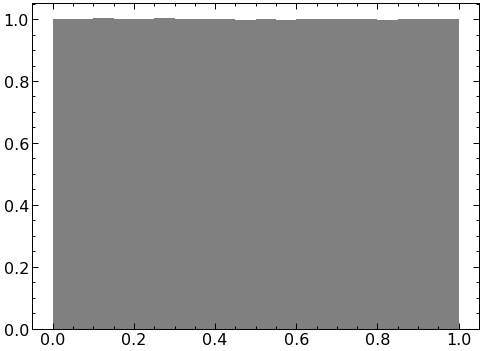

In [3]:
# 将随机数个数从 10 0000 变到 1000 0000 观察 uniform distribution 结果

r1 = rand(10000000)

_ = plt.hist(r1, bins=20, density=True, color='grey')

可用 **a + (b - a) * rand()** 抽样区间 [a, b] 上均匀分布的随机数

\begin{align}
p(x) = {1 \over b - a}
\end{align}

In [4]:
# 抽样产生区间 [a, b] 上的均匀分布 (uniform distribution)
def uniform(n=1, a=0, b=0):
    ''':n: number of samples
    :a: lower range
    :b: higher range
    
    :return: n random numbers obeys uniform distribution
             in the range of [a, b]'''  
    return a + (b - a) * rand(n)

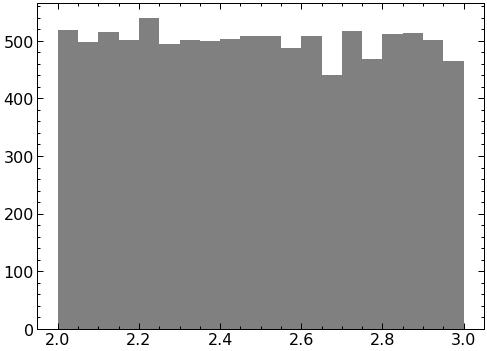

In [5]:
# 产生区间为 [-1, 1] 上均匀分布的随机数
r2 = uniform(n=10000, a=2, b=3)

_ = plt.hist(r2, bins=20, color='grey')

## 一维正态分布 （ Normal Distribution ）

若随机变量 X 服从均值(mean)为 $\mu$, 方差(variance)为 $\sigma^2$ 的正态分布，其概率密度函数为，

\begin{align}
f(x) = {1 \over \sqrt{2\pi \sigma^2} } \exp\left(-{(x - \mu)^2 \over 2 \sigma^2} \right)
\end{align}

记为 $X\sim \mathcal{N}(\mu, \sigma^2)$。

- np.random.randn() 按标准正态分布抽样，$\mathcal{N}(0, 1)$

- 如果想用 python 抽样 $Y \sim \mathcal{N}(\mu, \sigma^2)$，可以使用 $y = \mu + x \sigma$ 做变量代换。

Text(2.5, 0.3, '$\\sigma$=1.00')

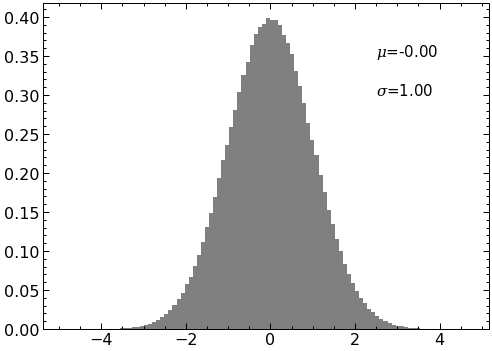

In [6]:
# 抽样产生100 0000标准正态分布
normal = np.random.randn(1000000)  

_ = plt.hist(normal, bins=100, density=True, color='grey')

plt.text(2.5, 0.35, r"$\mu$=%.2f"%normal.mean(), size=15)
plt.text(2.5, 0.30, r"$\sigma$=%.2f"%normal.std(), size=15)

## 回顾基础知识 -- 随机变量（Random Variable）

随机变量是其值随机会而定的变量, 它的值依赖于特定事件的发生、测量或输出。

举例，正常人的体温，每次测量都有一个新结果，但值满足一定的分布。

记 $X$ 是随机变量，它的取值记为 x。我们之前抽取的随机数都可以看做随机变量的取值。

$X$ 的取值在 $x$ 和 $x+dx$ 之间的概率（Probability）为，

\begin{align}
P(x < X < x +dx) = d G(x) = g(x) dx
\end{align}

其中，$g(x)$ 称为随机变量 X 的**概率分布密度函数**或**分布密度函数(pdf)**。

$G(x)$ 称作 X 的**分布函数**，或**累积概率分布函数(cdf)**。如果 X 是连续随机变量，cdf 定义为

\begin{align}
G(x) = \int_{-\infty}^x g(t) dt
\end{align}

由 $dG(x) = g(x) dx$ 知，概率密度 pdf 是累积概率 cdf 的微分，

\begin{align}
g(x) = {d G(x) \over dx}
\end{align}

- 通常，概率分布密度 $g(x)$ 是归一化的，即 $\int_{-\infty}^{\infty} g(x) dx = 1$
- 累积概率分布函数 $G(x)$ 是 [0, 1] 区间的单调递增函数

比如：在区间 [a, b] 上服从均匀分布 (uniform distribution)的随机变量，其概率密度分布函数为，

\begin{align}
g(x)  = \left\{\begin{array}{ll}
{1 \over b - a} & {\rm for}\ x \in [a, b] \\
0 & {\rm otherwise}
\end{array}\right.
\end{align}

其累积概率函数 


\begin{align}
G(x) & = \int_a^x {1 \over b - a} dx' = {x - a \over b - a}
\end{align}

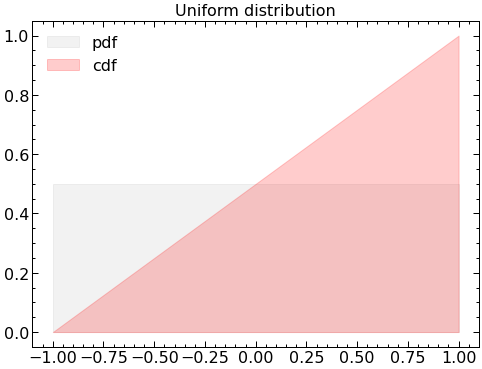

In [7]:
def plot_uniform_pdf_cdf(a, b):
    x = np.linspace(a, b, 50)
    G = (x - a) / (b - a)
    g = np.ones_like(x) * 1/(b-a)
    plt.fill_between(x, g, label='pdf', alpha=0.1, color='grey')
    plt.fill_between(x, G, label="cdf", alpha=0.2, color='red')
    plt.legend(loc='upper left')
    plt.title('Uniform distribution')

plot_uniform_pdf_cdf(a=-1, b=1)

标准正态分布的概率密度分布函数 pdf 为，
\begin{align}
g(x) = {1 \over \sqrt{2\pi} } \exp\left(-{x^2 \over 2} \right)
\end{align}

它的累积概率分布 cdf 可以数值的积分出，

\begin{align}
G(x) = \int_{-\infty}^x {1 \over \sqrt{2\pi} } \exp\left(-{t^2 \over 2} \right)dt
\end{align}

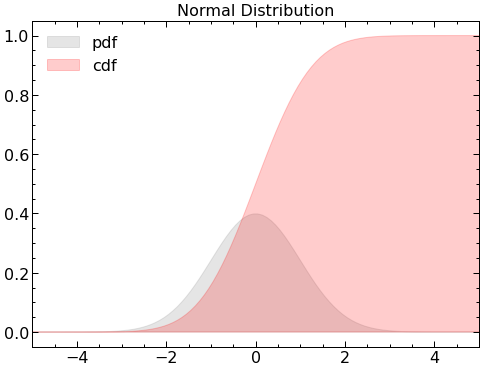

In [8]:
def plot_normal_pdf_cdf(n=2000):
    x = np.linspace(-100, 100, n)
    g = 1/np.sqrt(2*np.pi) * np.exp(-x**2/2)
    # simps() 是 scipy 积分模块中的辛普森积分函数
    G = [simps(g[:i], x[:i]) for i in range(1, n)]
    plt.fill_between(x, g, label='pdf', alpha=0.2, color='grey')
    plt.fill_between(x[:-1], G, label="cdf", alpha=0.2, color='red')
    plt.legend(loc='upper left')
    plt.xlim(-5, 5)
    plt.title("Normal Distribution")

plot_normal_pdf_cdf()

**举例：$5\sigma$ 超人**

如果人类的智商、情商、体力等任何一方面素质满足正态分布，那么可以将超人定义为，

**智商、情商、体力等任何一方面素质超过平均值 $5\sigma$ 的那些人！**

接下来可以使用 cdf 计算一下平均多少人里会出一个 $5\sigma$ 超人,

\begin{align}
G(x=5\sigma) = \int_{-\infty}^{5} {1 \over \sqrt{2\pi} } \exp\left(-{t^2 \over 2} \right)dt
\end{align}
标准正态分布中，$\sigma=1$。

In [9]:
from scipy.stats import norm

# scipy.stats 中定义了很多不同的概率密度分布函数
norm.cdf(5)

# 5 sigma 超人需要超过 99.99997% 的人, 即 1千万人中的前 3 名
# 虽然听起来很难，但每人都有特长，只需在一个方面做到极致

0.9999997133484281

**举例：** $\mu$ 子反常磁矩测量值与标准模型计算结果相差 $4.2\sigma$, 置信度是多少？

**置信度（或置信水平）**定义为， 

\begin{align}
P(|y| < t_{\alpha}) = {1 \over \sqrt{2\pi}} \int_{-t_{\alpha}}^{t_{\alpha}} dx e^{-x^2/2} = 1 - \alpha
\end{align}

$1-\alpha$ 称为置信度、置信水平(confidence level), $\alpha$ 有时称作幸存率(survival level)。

与 cdf 的定义不同，这里积分下限不是 $-\infty$, 而是 $-t_{\alpha}$。

$[-t_{\alpha}, t_{\alpha}]$ 被称作置信区间 (confidence interval)。

注：实验上超出 $4\sigma$一般称证据(evidence)，超出 $5\sigma$ 一般称发现(discovery)。

所以很多文章的标题称“发现超出标准模型的新物理的证据”。

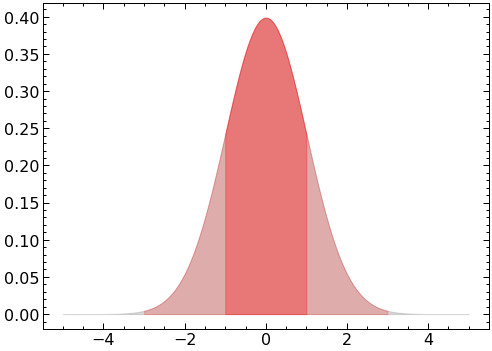

In [10]:
def plot_confidence_interval():
    # 绘制 5 sigma，3 sigma 和 1 sigma 的置信区间
    t5 = np.linspace(-5, 5, 100)
    t3 = np.linspace(-3, 3, 100)
    t1 = np.linspace(-1, 1, 100)
    
    plt.fill_between(t5, norm.pdf(t5), color='grey', alpha=0.3)
    plt.fill_between(t3, norm.pdf(t3), color='red', alpha=0.2)
    plt.fill_between(t1, norm.pdf(t1), color='red', alpha=0.3)
    
plot_confidence_interval()

In [11]:
# 查表得到的置信区间的上界 ta: n sigma 
ta = [0.6745, 1, 1.645, 1.9606, 2.0, 2.5756, 3.0]

# 查表得到的置信水平 confident level
confident_level = [0.5, 0.6827, 0.90000, 0.9500, 0.9545, 0.9900, 0.9973]

# norm.interval(置信度) 给出了置信区间
norm.interval(0.9545)

(-2.0000024438996036, 2.0000024438996027)

对于左右对称的标准正态分布，可以从 cdf 函数简单的计算置信度，

\begin{align}
P(|y| < t_{\alpha}) = 1 - 2{\rm cdf}(-t_{\alpha})
\end{align}

In [12]:
def norm_confident_level(ta):
    # 计算正态分布的 confidence level
    ta_ = np.abs(ta)
    level = 1 - 2*norm.cdf(-ta_)
    return level

norm_confident_level(4.2)

0.9999733085019682

In [13]:
ta = np.array([0.6745, 1, 1.645, 1.9606, 2.0, 2.5756, 3.0, 4.0, 4.2, 5.0])

cl = norm_confident_level(ta)

df = pd.DataFrame({'confidence_interval_uppper_bound':ta,
                   'confidence_level':cl})
df

,confidence_interval_uppper_bound,confidence_level
0,0.6745,0.500007
1,1.0000,0.682689
2,1.6450,0.900030
3,1.9606,0.950074
4,2.0000,0.954500
5,2.5756,0.989993
6,3.0000,0.997300
7,4.0000,0.999937
8,4.2000,0.999973
9,5.0000,0.999999


## 均值 mean、方差 var 与标准差 std
对于从分布函数抽样出的一系列随机数，可以计算他们的诸多统计性质，比如

均值(mean), 方差 var 和标准差 std： 

\begin{align}
\mu &= {1\over N}\sum_{i=1}^N  x_i \\
{\rm var} &= {1\over N}\sum_{i=1}^N  (x_i - \mu)^2 \\
{\rm std} &= \sqrt{\rm var} = \sqrt{{1\over N}\sum_{i=1}^N  (x_i - \mu)^2}
\end{align}


In [14]:
# x 是从标准正态分布中抽样出的 10 0000 个随机数

x =  np.random.randn(100000)
### 均值
mu = x.sum() / len(x)

## 方差
var = np.mean((x - x.mean())**2)

## 标准差
std = np.sqrt(var)

print("mean, std=", (mu, std))

mean, std= (-0.0035134913237859122, 1.000379070807359)


In [15]:
# 对比 numpy 的均值 mean() 与标准差 std() 函数计算结果

# var = mean(abs(x - x.mean())**2) = std**2

print("np.mean, np.std=", (np.mean(x), np.std(x)))

np.mean, np.std= (-0.0035134913237859122, 1.000379070807359)


## 涨落、关联、熵

定义涨落 $\delta x$ 为 随机变量取值 x 与均值 $\overline{x}$ 的差 $\delta x = x - \overline{x}$。这里定义了 $\overline x = {1\over N}\sum_i x_i$

方差 var 是涨落的平方的均值，可以简写为，

\begin{align}
{\rm var} &= \overline{\delta x^2} \\
 & = \overline{(x - \overline{x})^2} \\
 & = \overline{x^2 - 2x\overline{x} + \overline{x}^2} \\
 & = \overline{x^2} - 2\overline{x}^2 + \overline{x}^2 \\
 & = \overline{x^2} - \overline{x}^2 
\end{align}

如果定义均值 $\overline{x}$ 为 x 的一阶矩，$x^2$ 的均值 $\overline{x^2}$ 为二阶矩，则方差 var 是 x 的一阶矩与二阶矩的组合。

方差是涨落的 2 阶矩，还可以定义涨落的高阶矩，

\begin{align}
m_2 &= \overline{(x - \overline{x})^2} \\
m_3 &= \overline{(x - \overline{x})^3} \\
m_4 &= \overline{(x - \overline{x})^4} \\
\end{align}

Skewness 和 Kurtosis 是分布函数形状的度量，定义为，
 
\begin{align}
{\rm Skewness} &= m_3 / m_2^{3/2} \\
{\rm Kurtosis} &= m_4 / m_2^{2}\\
\end{align}

这些涨落的高阶矩对分布函数的形状非常敏感，被用来寻找 QCD 相变临界点。

如果两个随机变量的取值同时增大、同时减小，则它们之间存在正关联。

如果两个随机变量中的一个增大时，另一个总是减小，则它们之间存在负关联。

两个事件的关联可以通过涨落定义，

\begin{align}
{\rm C(x, y)} &= \overline{\delta x \delta y} \\
 & = \overline{(x - \overline{x})(y - \overline{y})} \\
 & = \overline{x y} - \overline{x}\ \overline{y}
\end{align}

如果有多个随机变量，则两两之间的关联构成了协方差矩阵（Covariance matrix)。

熵反应了系统的混乱程度，熵越大，信息量越少，计算公式为 

\begin{align}
S = - \int f(x) \ln f(x) dx
\end{align}

如果 $f(x)$ 是均匀分布，则系统包含信息量最少，S 最大。

如果 $f(x)$ 有很尖的峰，表示信息很明确，随机变量的取值很确定，S 很小。

In [16]:
# 计算一个分布函数的熵
def total_entropy(f, a, b):
    x = np.linspace(a, b, 1000)
    s = - simps(f(x)*np.log(f(x)), x)
    return s

def gauss_func(x, mu, std):
    return 1/np.sqrt(2*np.pi*std**2) * np.exp(-0.5*x**2/std**2)

In [17]:
f = lambda x: gauss_func(x, mu=0, std=1)

total_entropy(f, -10, 10)

1.4189385332046727

In [18]:
# scipy.stats.norm.entropy() 计算熵的函数

norm.entropy()

array(1.41893853)

In [19]:
# 高斯分布越宽，熵越大

f = lambda x: gauss_func(x, mu=0, std=2)

total_entropy(f, -10, 10)

2.112077069338219

In [20]:
# 高斯分布越窄，熵越小

f = lambda x: gauss_func(x, mu=0, std=0.5)

total_entropy(f, -10, 10)

0.7257913526447275

## n 个骰子一起投猜总和，哪个数出现概率最大

设 $X_i$ 满足取值为 [1,2,3,4,5,6] 的离散分布，n 个的和为，

\begin{align}
X = \sum_{i=0}^{n} X_i
\end{align}

- 当 n 个骰子都为 1 时，$X$ 取最小值 n.
- 当 n 个骰子都为 6 时，$X$ 取最大值 6n.
- 问题：$X$ 取哪个数的概率最大？（大家先猜一个数）

In [21]:
def throw_ndice(n = 6):
    ''' 同时扔 n 个筛子，设 n 个筛子朝上的面中数字的和为随机变量 S
    求 S 所满足的分布，以及 S 取什么值的概率最大（赢面最大）
    :n: 骰子个数 （尝试 2, 5，6， 7， 8 个骰子）
    :num_experiment: 抽样次数'''
    num_experiment = 10000000
    ## randint(low=1, high=7) 抽样 1 到 6 的随机整数
    count = np.random.randint(low=1, high=7,
                          size=(num_experiment, n))
    _ = plt.hist(count.sum(axis=1), bins=200, color='grey')
    xlabel = '+'.join([r'$x_%s$'%i for i in range(n)])
    plt.xlabel(xlabel)
    plt.ylabel("Count")

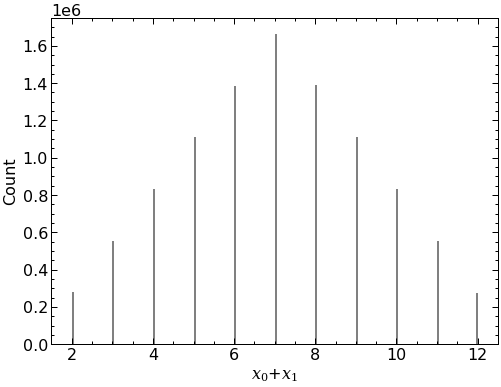

In [22]:
throw_ndice(n=2)

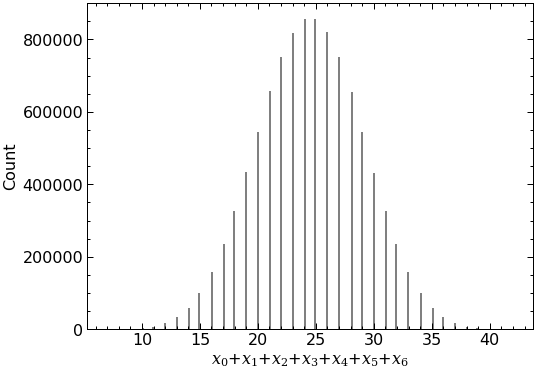

In [23]:
throw_ndice(n=7)

### 投点法计算 $\pi$ 的数值

(在黑板上画示意图）

边长为 1 的正方形的 1/4 内切圆，其面积与正方形的面积之比为 $\pi/4$。

如果向正方形内随机撒 N 个点，M 个点落在圆形内部，可以得到

\begin{align}
{\pi \over 4} \approx \lim_{N\rightarrow \infty} {M \over N}
\end{align}

In [24]:
def calc_pi(n=100):
    '''calc the value of pi using Monte carlo method
    :n: num of points to sample'''
    # np.random.rand() 抽样出 [0，1) 内均匀分布的随机数
    x = np.random.rand(n, 2)
    incirc = x[:, 0]**2 + x[:, 1]**2 < 1
    # 落入圆内的点的计数
    m = np.where(incirc, 1, 0)
    my_pi = 4 * m.sum() / n
    
    xin = x[m.astype(np.bool)]
    xou = x[~m.astype(np.bool)]
    
    plt.figure(figsize=(8, 6))
    plt.title("pi = 4m/n = %s"%my_pi)
    # 投点
    plt.plot(xin[:, 0], xin[:, 1], 'o', color='grey', ms=2, alpha=0.3)
    plt.plot(xou[:, 0], xou[:, 1], 'o', color='red', ms=2, alpha=0.3)
    # 画 1/4 圆
    xc = np.linspace(0, 1, 100)
    yc = np.sqrt(1 - xc*xc)
    
    plt.fill_between(xc, yc, color='k', alpha=0.2)
    
    plt.gca().set_aspect('equal')

In [25]:
interact(calc_pi, n=[100, int(1E4), int(1E5), int(1E6)])

interactive(children=(Dropdown(description='n', options=(100, 10000, 100000, 1000000), value=100), Output()), …

<function __main__.calc_pi(n=100)>

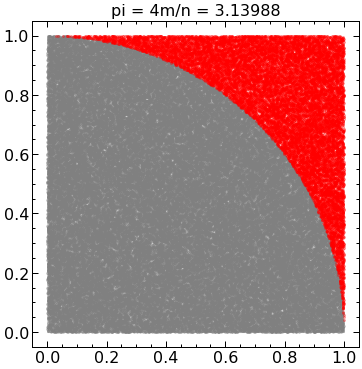

In [26]:
calc_pi(n=100000)

## 解析难算的 2D 面积

正方形内与左下和右下两个顶点连线成 $90^{\circ}$ 角的所有点形成的轨迹为半圆。

使用蒙特卡洛方法计算夹角为 $\theta$ 时所有点形成的轨迹，以及此轨迹与底边形成的图形的面积。

In [27]:
def plot_trace(theta=0.5*np.pi, n=1000):
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    x = np.random.rand(n, 2)
    
    theta1 = np.arctan2(x[:, 1], x[:, 0])
    theta2 = np.arctan2(x[:, 1], 1-x[:, 0])
    thetas = np.pi - theta1 - theta2
    
    x_ = x[thetas > theta]
    
    plt.title("area = %s"%(len(x_)/n))
    
    plt.plot(x_[:, 0], x_[:, 1], 'o', color='grey')
    
    plt.gca().set_aspect('equal')

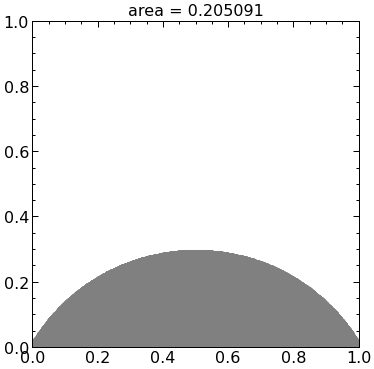

In [28]:
plot_trace(theta=2*np.pi/3, n=1000000)

## 如何对任意分布函数抽样？

上面举的例子使用了均匀分布(uniform distribution)抽样出的随机数和正态分布(normal distribution)抽样出的随机数。

一般的随机数产生器都会提供 [0, 1) 区间内均匀分布的抽样方法，

其它分布在均匀分布的随机数的帮助下产生。


**离散型随机变量抽样**

使用均匀分布的随机数可以非常简单的做离散型随机变量的抽样。

设离散型随机变量 X 取 $x_0, x_1, \cdots, x_{n-1}$ 时对应的概率分布是 $p_0, p_1, \cdots, p_{n-1}$, 且

\begin{align}
p_0 + p_1 + \cdots p_{n-1} = 1
\end{align}

则可以按如下方法抽样，
```python
if ran < p0:
    return x0
elif ran < p0 + p1:
    return x1
...
elif ran < p0 + p1 + ... + pn_1:
    return xn_1
```


**连续型随机变量直接法抽样**（又称反函数法）

如果概率密度分布 p(x) 的累积概率（cdf 或称分布函数）F(x) 能够解析计算，

则可以对随机变量 Y 按 [0, 1] 区间的均匀分布抽样，获得 $y_1, y_2, \cdots, y_n$ 等 n 个样本,

设 $X = F^{-1}(Y)$, 可以得到一系列点 $x_1, x_2, \cdots, x_n$, 这些点就是满足概率密度分布 p(x) 的样本。

**反函数法抽样证明**：

因为 Y 在 [0, 1] 区间上服从均匀分布，则其 cdf 满足，
\begin{align}
G(y) = Pr(Y \le y) = \int_0^y 1 dy' = y
\end{align}

现在证明按 $X = F^{-1}(Y)$ 抽样得到的 X 的累积概率是 $F(x)$，
\begin{align}
Pr(X \le x) &= Pr(F^{-1}(Y) \le x) \\
& = Pr(F(F^{-1}(Y)) \le F(x)) \\
& = Pr(Y \le F(x)) \\
& = G(F(x)) \\
& = F(x)
\end{align}
第 2 步用到了 F(x) 单调递增的特征。

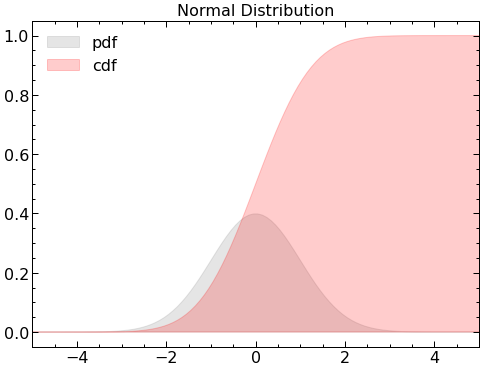

In [29]:
# 直观的来看，cdf 斜率大的地方，概率密度比较高
# 所以均匀分布的 cdf，在斜率大的区间反函数抽样得到的样本多  
plot_normal_pdf_cdf()

反函数法有非常广泛的应用场景，就算是 cdf 解析积分算不出，反函数没法求，也可以用**数值反函数法**。

此时，可以数值求解积分，得到一系列等间距的 x 点上的 cdf。

然后将 (cdf, x) 配对，进行插值，就可以得到 cdf 的**数值反函数**。

对于一维情形，这种方法甚至可以应用于由 histogram 给出的 pdf。

### 舍选法抽样 （Rejection Sampling）

舍选法抽样属于比较暴力的抽样，一般反函数法或变量变换法不行的都可以用舍选法。

这种方法的原理可以用下面示意图表示，

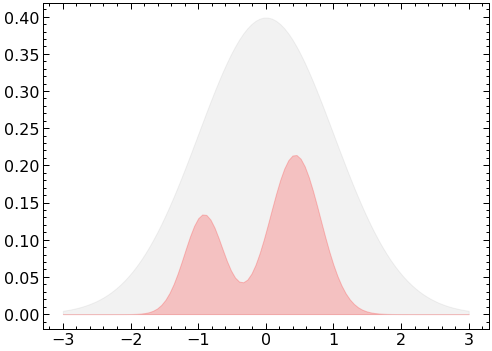

In [30]:
# 目标：抽样满足红区域的概率密度 g(x) 
# 如果灰色分布 f(x) 比较好抽样，则可以用它抽取一些点 x_i
# 再按 [0, 1] 区间均匀分布抽样 r， 计算纵坐标 y_i = f(x_i)*r
# 如果 y_i < g(x_i), 点落在红色区域，则接受(Accept)，否则舍弃（Reject）

x = np.linspace(-3, 3, 100)
y1 = norm(0, 1).pdf(x)
y2 = (0.4 * norm(-1, 0.3).pdf(x) + 0.6*norm(0.5, 0.4).pdf(x)) 

plt.fill_between(x, y1, alpha=0.1, color='grey')
plt.fill_between(x, y1*y2, alpha=0.2, color='red')

## 蒙卡抽样在高能核物理中的应用

   - 碰撞参数的抽样
   - 核子在原子核内分布的抽样（Woods-Saxon 与 $\theta$, $\phi$) 注意 cos(theta) 满足均匀分布，而非 theta
   - 变形核碰撞时欧拉旋转角的抽样(Group theory in a nutshell for physicists, page 77。使用 SO3 群生成元。)
   - Boltzmann 分布，Fermi-dirac，Bose-Einstein 分布，Cooper-Frye 公式
   - 分子动力学模拟中给定温度抽取粒子速度分布


### 抽样核-核碰撞的碰撞参数

In [31]:
def collide(coord1=(-5, 0), coord2=(5, 0), radius=6):
    '''绘制核碰撞在横平面的示意图
       coord1: (x, y) 第一个原子核的坐标
       coord2: (x, y) 第二个原子核的坐标'''
    circ1 = mpatches.Circle(coord1, radius, 
                            facecolor='red',
                            #fill = False,
                            edgecolor='red',
                            alpha=0.4)

    circ2 = mpatches.Circle(coord2, radius,
                            alpha=0.4,
                            edgecolor='grey',
                            facecolor='grey'
                           )

    plt.gca().add_patch(circ1)
    plt.gca().add_patch(circ2)

    plt.xlim(-20, 20)
    plt.ylim(-20, 20)
    plt.gca().set_aspect('equal')

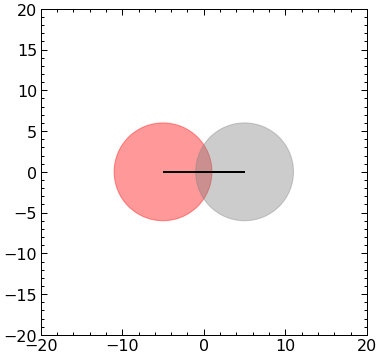

In [32]:
collide()

# 碰撞参数（impact parameter): 两个原子核质心位置的横向距离
plt.hlines(y=0, xmin=-5, xmax=5)

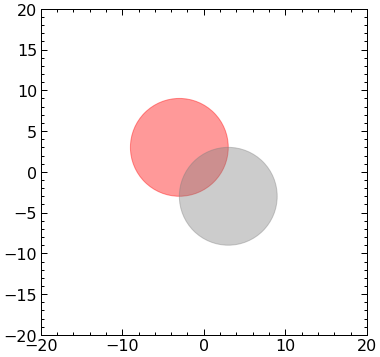

In [33]:
# 碰撞参数与束流方向构成的平面称反应平面（Reaction Plane）
# 理论模型一般把反应平面定在 (x, z) 平面上, 而非下列情形
coord1 = (-3, 3)
coord2 = (3, -3)

collide(coord1, coord2)

Text(-15, 15, 'b = 10 fm')

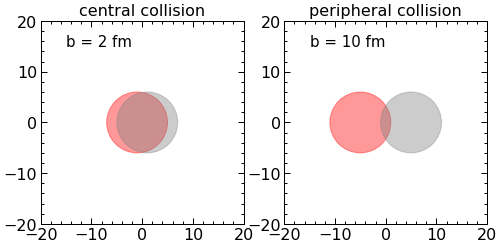

In [34]:
# 此时模拟一次碰撞，需要抽样碰撞参数 b
# 如果 b 比较小，则对应中心碰撞（central collisions）
# 如果 b 比较大，则对应偏心碰撞 (peripheral collisions)
plt.subplot(121)
collide(coord1=(-1, 0), 
        coord2=(1, 0))
plt.title("central collision")
plt.text(-15, 15, "b = 2 fm", size=15)

plt.subplot(122)
collide(coord1=(-5, 0), 
        coord2=(5, 0))
plt.title("peripheral collision")
plt.text(-15, 15, "b = 10 fm", size=15)

**问题** 

如果原子核半径为 R，则对所有发生的核碰撞，碰撞参数 b 的分布是否是 [0, 2 R] 区间的 uniform distribution?

b = 0， 对应两个原子核完全重叠； b = 2 R，表示两个原子核刚刚接触到彼此。

如果发生了 100 万次核碰撞，其中碰撞参数 b = $2\pm0.1$ fm 的概率与 b = $10\pm0.1$ fm 的概率是否相同？

**答案**

不是！碰撞参数 b 满足的分布不是均匀分布| uniform distribution? 

想一想打靶，如果弹孔坐标 (x, y) 在二维圆形靶（半径为 D）上是均匀分布，单位面积弹孔个数为 $\rho$, 

则距离靶心为 b 和 $b+d b$ 的圆环内的弹孔个数为 $ 2\pi b db$, 

子弹落在这个圆环内的概率为 

\begin{align}
P = {2\pi b \ {\rm d} b \over \pi D^2} = p(b) \ {\rm d}b 
\end{align}

**结论**：靶上均匀分布的弹孔离靶心的距离 b 所满足的概率密度分布为 $p(b) = 2b / D^2$。

In [35]:
def target(b=3, db=1.5, D=6):
    plt.figure(figsize=(6, 6))
    target = mpatches.Circle((0, 0), D,
                            alpha=0.4,
                            edgecolor='black',
                            facecolor='white'
                           )
    ring1 =  mpatches.Circle((0, 0), b+db,
                            alpha=0.4,
                            edgecolor='red',
                            facecolor='red'
                           )
    ring2 =  mpatches.Circle((0, 0), b,
                            alpha=1,
                            edgecolor='white',
                            facecolor='white'
                           )
    rmax = D + 1
    plt.xlim(-rmax, rmax)
    plt.ylim(-rmax, rmax)
    plt.gca().set_aspect('equal')
    
    plt.gca().add_patch(target)
    plt.gca().add_patch(ring1)
    plt.gca().add_patch(ring2)
    
    plt.hlines(0, xmin=0, xmax=b)
    plt.text(1, 0.5, "b")
    plt.title(r"Area of ring = $2\pi b db$")
    
    plt.text(3.5, 0.5, r"${\rm d} b$", color='w')
    plt.hlines(0, 3., 3+db, color="w")
    plt.gca().axis('off')

Text(0.5, 5, 'D')

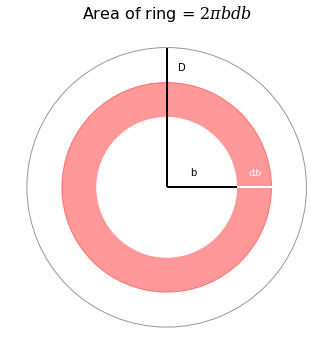

In [36]:
target()
# 在核核碰撞中，靶的半径 D = 2R，R为原子核半径

plt.vlines(0, ymin=0, ymax=6)
plt.text(0.5, 5, "D")

### 对碰撞参数抽样的第一种方法

直接抽样法:

1. 首先计算累积概率，或称概率分布函数 $F(b)$，（注意此处没有“密度”两个字）

\begin{align}
F(b) &= \int_0^b p(b') db' = \int_0^b {2 b' \over D^2} db' = {b^2 \over D^2}
\end{align}

2. 对累积概率按均匀分布抽样 r ~ F(b)


3. 求累积概率的反函数 $b = \sqrt{r D^2}$

In [37]:
## 对碰撞参数按照 p(b) = 2 b/D^2 抽样
def sample_impact_parameter(n=1000, nuclear_radius=8):
    D = 2 * nuclear_radius
    # 先计算累积概率函数 cdf = int_0^b p(b') db' = b^2 / D^2
    # 累积概率是 0 到 1 之间均匀分布的随机数
    cdf = np.random.rand(n)
    # 用直接抽样法，求 cdf 的逆，得到 b = sqrt(D^2 * cdf)
    b = np.sqrt(cdf * D**2)
    return b

Text(0, 0.5, 'probability density')

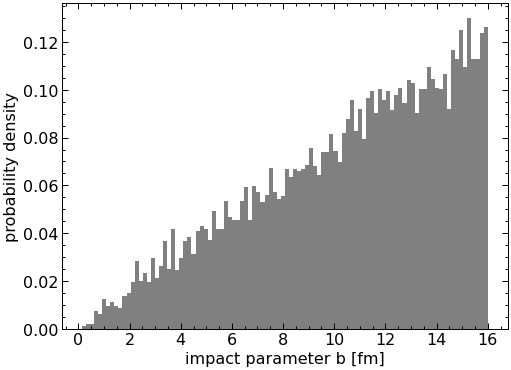

In [38]:
b = sample_impact_parameter(n=10000)

_ = plt.hist(b, bins=100, density=True, color='grey')

plt.xlabel("impact parameter b [fm]")
plt.ylabel("probability density")

# 结论：偏心碰撞概率要远大于对心碰撞 (b=0)

### 对碰撞参数抽样的第二种方法

有些参考书上显示，碰撞参数 b 可以按下面这种方法抽样， 

\begin{align}
b = D * {\rm max}(r_1, r_2)
\end{align}

其中 D = 2R 是原子核半径的两倍， $r_1$ 和 $r_2$ 是 [0, 1] 范围内的两个随机数。

In [39]:
# 首先我们来验证 b = D * max(r1, r2) 能正确产生碰撞参数的抽样
## 对碰撞参数按照 p(b) = 2 b/D^2 抽样的第 2 种方法
def sample_impact_parameter_method2(n=1000, nuclear_radius=8):
    D = 2 * nuclear_radius
    r1 = np.random.rand(n)
    r2 = np.random.rand(n)
    # choose x if x>y, otherwise choose y
    b = D * np.where(r1 > r2, r1, r2)
    return b

Text(0, 0.5, 'probability density')

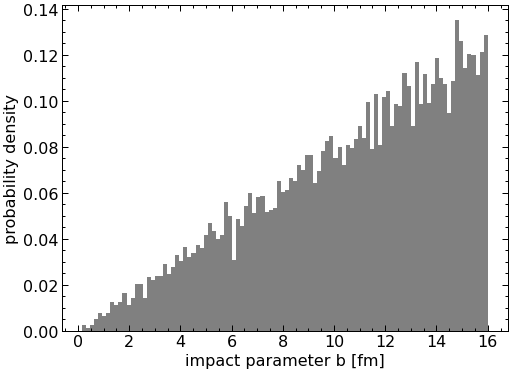

In [40]:
b1 = sample_impact_parameter_method2(n=10000)

_ = plt.hist(b1, bins=100, density=True, color='grey')

plt.xlabel("impact parameter b [fm]")
plt.ylabel("probability density")
# 结论： 看上去结果与前一种方法无差别

**问题**

为何概率密度分布 $p(b) = {2b \over D} $ 可用 b = D * max(r1, r2) 抽样？

**答案**：使用了舍选抽样法原理，

待抽样的分布函数是 $p(b) = 2b / D^2$, 碰撞参数 b 的取值范围为 $[0, D]$, 

其最大值 $y_{max} = p(b=D) = 2 / D$

按照舍选法抽样，
```python
while True:
    b = D * r1
    y = y_max * r2
    if y < p(b): 
        accept
        break
```   

可以看到接受(accept) b 的条件是 y < p(b), 即 $y_{max} r_2 < p(D r_1)$, 得到 ${2 r_2 \over D} < {2 D r_1 \over D^2}$,

即 $r_2 < r_1$ 时，接受 $b = D \times r_1$。

为了不浪费随机数，如果 $r1 < r2$, 将两者交换，$b = D \times r_2$ 仍是被 accept 的抽样。 



### 抽样核子在原子核内的分布

对于非变形核，比如铅原子核这样的双幻数核，核子在原子核内的迳向位置 r 满足 Woods-Saxon 分布，

\begin{align}
\rho(r) = {\rho_0 \over 1 + e^{(r - R)/\sigma}}
\end{align}

其中 
- $\rho_0 \sim 0.15 \ /fm^3$, 
- $R = 1.2A^{1/3}$ fm 是原子核的电荷半径
- $A$ 是原子核（nucleus）包含的核子(nucleon) 的个数
- $\sigma \sim 0.5$ fm 是 R 之外核子的弥散厚度。

总的核子数应该满足归一化条件，

\begin{align}
\int_0^{\infty}{\rm d}r \int_0^{\pi} {\rm d}\theta \int_{0}^{2\pi} {\rm d}\phi\ \rho(r) r^2 \sin \theta  = A
\end{align}

其中 A 是原子核内的核子数（质子数+中子数）。

In [41]:
# 检验归一化条件 (R 经验公式不准确，sigma 也非实验测量数据，带来一定的误差)
from scipy.integrate import simps

def woods_saxon(r, rho0=0.15, A=197, sigma=0.5):
    R = 1.2 * A**(1/3)
    return rho0 / (1 + np.exp((r - R)/sigma))

r = np.linspace(0, 20, 1000)
rho = woods_saxon(r)

num_nucleons = simps(rho*r**2, r) * 4 * np.pi

print("\int 4 pi r**2 rho(r) dr = ", num_nucleons)

\int 4 pi r**2 rho(r) dr =  224.71455895833978


如果假设原子核是半径为 $R$ 的硬球，核子在原子核内均匀分布， $\rho(r)=\rho_0$。 

假设原子核的中心位置在 (x, y, z) = (0, 0, 0), 此时如何抽样 A 个核子在原子核内的坐标？

\begin{align}
(x_i, y_i, z_i) \quad\; {\rm for\ i=(0, 1, 2, \cdots, A-1)}
\end{align}

简单做法：
1. 按均匀分布抽取三个随机数 $r_1, r_2, r_3 \in [-1, 1]$，此时几何结构为边长为 2 的立方体。
2. 判断以 $(r_1, r_2, r_3)$ 为三维坐标的点是否在半径为 1 的三维球面内部 
    - 如果：$r_1^2 + r_2^2 + r_3^2 < 1$, 则接受抽样，$(x, y, z) = R * (r_1, r_2, r_3)$
    - 反之，则回到第一步，重新抽取
3. 攒够 A 个核子的坐标 (x, y, z) 后停止

如果核子在原子核内不是均匀分布，而是 Woods-saxon 或者变形（deformed） Woods-saxon 分布，上面介绍的方法就不太适用。

我们可以在球坐标系下抽样核子在原子核内的径向分布 r, 极角 $\theta$ 和方位角 $\phi$，

\begin{align}
x & = r \sin(\theta) \sin(\phi) \\
y & = r \sin(\theta) \cos(\phi) \\
z & = r \cos(\theta)
\end{align}

此时极角(polar angle) 范围 $[0, \pi]$, 方位角(azimuthal angle) 范围 $[-\pi, \pi)$, 或等价的写为 $[0, 2\pi)$。

**问题**：是否按 Woods-Saxon 分布 $\rho(r)$ 抽取 r， 按均匀分布抽样 $\theta$ 和 $\phi$ 就可以了？

**回答** No！

做蒙特卡洛抽样时，很多时候要抽取的概率密度分布函数并不是那么直观，比如上面介绍的碰撞参数抽样！

核子在原子核内的分布是另外一个典型的例子。

**正确做法**：为了抽取核子在原子核内的分布，可以在球坐标系下写出核子的概率分布，由体积微元内核子数除以核子总数 A 得到，

\begin{align}
{dN \over A} = { \rho(r)r^2 \sin\theta dr d\theta d\phi \over A} = p(r) p(\theta) p(\phi) dr d\theta d\phi
\end{align}

因此，可以定义如下 3 个独立的概率密度分布函数

\begin{align}
p(r) &= {4\pi r^2 \rho(r) / A} & r \in [0, \infty]\\
p(\theta) &= {\sin\theta \over 2}, &\theta \in [0, \pi] \\
p(\phi) &= {1 \over 2\pi}, & \phi \in [0, 2\pi]
\end{align}


结论：

1. p(r) 不是 Woods-saxon 分布，需要额外乘以 $r^2$ 

2. 极角 $\theta$ 不能按均匀分布抽样，需要按 $p(\theta)={\sin \theta \over 2}$ 在 $[0, \pi]$ 抽样

3. 只有方位角 $\phi$ 可以直接按照均匀分布抽样

**方位角 $\phi$ 的抽样用均匀分布**
\begin{align}
\phi = 2 \pi r_1
\end{align}
其中 $r_1 \sim U[0, 1]$(表示 $r_1$ 服从 [0, 1] 区间均匀分布）。

**极角 $\theta$** 服从 $p(\theta) = {\sin \theta \over 2}$ 分布密度函数，$\theta \in [0, \pi]$

使用直接法（cdf 反函数法），

\begin{align}
G(\theta) = \int^{\theta}_0 {\sin\theta' \over 2} d\theta' &= {1 - \cos\theta \over 2} = Y
\end{align}

此时，将累积概率分布定义成随机变量 $Y$，按 $Y \sim U[0, 1]$ 抽要，计算$\theta$ 的反函数，

\begin{align}
\cos\theta  &= 1 - 2 Y \\
\theta &= \arcsin(1 - 2 Y) \\
\sin \theta &= \sqrt{1 - \cos^2 \theta}
\end{align}

因为 $Y \sim U[0, 1]$, 所以 $\cos \theta = 1 - 2Y \sim U[-1, 1]$, 

因此可以直接定义 $\chi = \cos \theta$，对 $\chi$ 按均匀分布 $U[-1, 1]$抽样，然后计算 $\sin \theta$。

### Woods-Saxon 分布下抽样核子在原子核内的位置

可以使用两种不同的抽样方法来对 p(r) 进行抽样

1. 舍选法抽样 （Rejection Sampling）
2. 直接抽样法：分片线性 cdf (大家可以自己尝试）

Text(0, 0.5, '$r^2 \\rho(r)\\ [{\\rm fm}]^{-1}$ ')

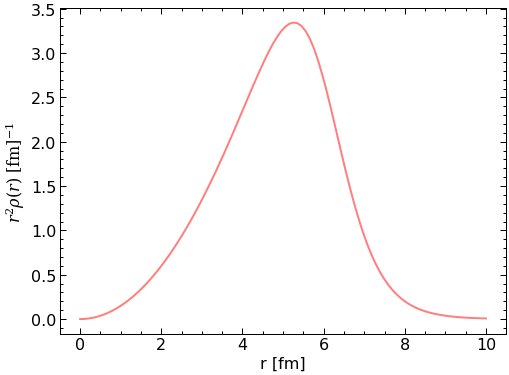

In [42]:
def woods_saxon_r2(r, R=6, sigma=0.52, rho0=0.15):
    return rho0 * r**2 / ( 1 + np.exp((r - R)/sigma))

r = np.linspace(0, 10, 100)
rho = woods_saxon_r2(r)

plt.plot(r, rho, color='r', alpha=0.5)
plt.xlabel("r [fm]")
plt.ylabel(r"$r^2 \rho(r)\ [{\rm fm}]^{-1}$ ")

In [43]:
### 对这种不好求 cdf 反函数的抽样，最暴力、直接的方法是舍选法 (Rejection Sampling)
from tqdm import tqdm

def rejection_sampling(pdf, n=1000, ymax=0.17, xmin=0, xmax=25):
    samples = np.zeros(n, dtype=np.float32)
    i = 0
    while i < n:
        x = xmin + (xmax - xmin) * np.random.rand()
        y = ymax * np.random.rand()
        if y < pdf(x):   # accept
            samples[i] = x
            i = i + 1
    
    return samples

Text(0, 0.5, 'p(r)')

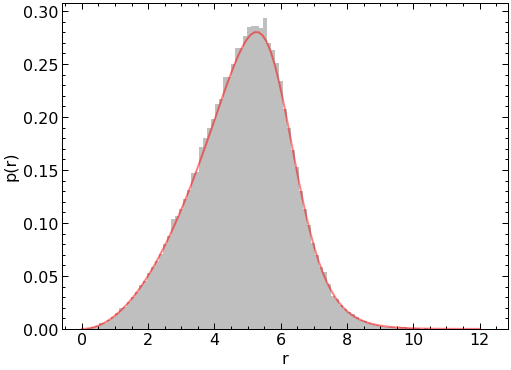

In [44]:
r = rejection_sampling(woods_saxon_r2, n=100000, ymax=3.5)

_ = plt.hist(r, bins=100, density=True, color='grey', alpha=0.5)

x = np.linspace(0, 12, 100)
y = woods_saxon_r2(x)

plt.plot(x, y/y.max() * 0.28, 'r-', alpha=0.5)

plt.xlabel('r')
plt.ylabel('p(r)')

## 作业

要做大量 $\pi^0$ 介子的分子动力学模拟，如果温度为 $T=150 $ MeV, 尝试抽取 1000 个 $\pi^0$ 介子的四动量 $k^{\mu} = (E, k_x, k_y, k_z)$。

注意：$\pi^0$ 介子是玻色子，质量 $m=135$ MeV, 动量的绝对值 $k=\sqrt{k_x^2 + k_y^2 + k_z^2}$ 满足玻色爱因斯坦分布函数，

\begin{align}
f(k) = {1 \over e^{\sqrt{k^2 + m^2} \over T} - 1}
\end{align}

提示1：先抽取动量的绝对值 k，然后赋予动量方向（$4\pi$ 角内均匀分布）得到极角 $\theta$ 和方位角 $\phi$, 然后转化为笛卡尔坐标下,

\begin{align}
k_x & = k \sin(\theta) \sin(\phi) \\
k_y & = k \sin(\theta) \cos(\phi) \\
k_z & = k \cos(\theta) \\
E &= \sqrt{m^2 + k_x^2 + k_y^2 + k_z^2}
\end{align}

提示2：要先用 10000 或更多样本验证抽取的 k, $E$, $k_x, k_y, k_z$, $\cos\theta$, $\phi$ 分布的正确性。正确性的验证方法需要自行设计。